<a href="https://colab.research.google.com/github/emilyhasson/gsod-analysis/blob/main/code/gsod_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and install Spark

In [4]:
#@title  <-- Run Me: (Hidden) Installing Spark
%%bash 

## Setup Spark on Colab
pip install -q pyspark
apt-get -qq install -y openjdk-8-jdk-headless

## Setup port-forwarding

# Download ngrok
wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# Unload ngrok
unzip -q ngrok-stable-linux-amd64.zip

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u312-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u312-b07-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

In [5]:
#@title  <-- Run Me: (Hidden) Environment Variable Setup
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [6]:
import pyspark 
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

# Set configuration scope to be local and use port 4050
config_scope = SparkConf().set("spark.ui.port", "4050")

# Create the connection to a Spark cluster
sc = pyspark.SparkContext(conf = config_scope)

# Create a session to programmatically build Spark RDD, DataFrame and DataSet
spark = SparkSession.builder.getOrCreate()

# Load Data from GitHub

In [7]:
!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2000_dir/2000weatherdata.csv"
df_2000 = spark.read.csv('2000weatherdata.csv', inferSchema = True, header = True)
dfs = []
dfs.append(df_2000)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2001_dir/2001weatherdata.csv"
df_2001 = spark.read.csv('2001weatherdata.csv', inferSchema = True, header = True)
dfs.append(df_2001)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2002_dir/2002weatherdata.csv"
df_2002 = spark.read.csv('2002weatherdata.csv', inferSchema = True, header = True)
dfs.append(df_2002)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2003_dir/2003weatherdata.csv"
df = spark.read.csv('2003weatherdata.csv', inferSchema = True, header = True)
dfs.append(df)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2004_dir/2004weatherdata.csv"
df = spark.read.csv('2004weatherdata.csv', inferSchema = True, header = True)
dfs.append(df)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2005_dir/2005weatherdata.csv"
df = spark.read.csv('2005weatherdata.csv', inferSchema = True, header = True)
dfs.append(df)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2006_dir/2006weatherdata.csv"
df = spark.read.csv('2006weatherdata.csv', inferSchema = True, header = True)
dfs.append(df)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2007_dir/2007weatherdata.csv"
df = spark.read.csv('2007weatherdata.csv', inferSchema = True, header = True)
dfs.append(df)

!wget "https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2008_dir/2008weatherdata.csv"
df = spark.read.csv('2008weatherdata.csv', inferSchema = True, header = True)
dfs.append(df)

--2022-05-09 22:14:39--  https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2000_dir/2000weatherdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11045114 (11M) [text/plain]
Saving to: ‘2000weatherdata.csv’

2000weatherdata.csv 100%[===================>]  10.53M  --.-KB/s    in 0.1s    

2022-05-09 22:14:39 (110 MB/s) - ‘2000weatherdata.csv’ saved [11045114/11045114]

--2022-05-09 22:14:51--  https://raw.githubusercontent.com/emilyhasson/gsod-analysis/main/data/2001_dir/2001weatherdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

# Preliminary EDA

Check entries per year

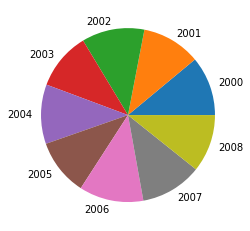

In [8]:
import matplotlib.pyplot as plt
import numpy as np

len_list = []
for df in dfs:
  len_list.append(df.count())
labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008"]


y = np.array(len_list)
plt.pie(y, labels=labels)
plt.show()

Check some different weather occurrences by year

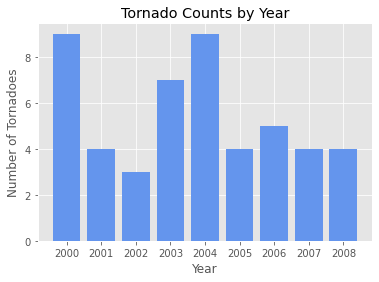

In [11]:
counts = []
for df in dfs:
  counts.append(df.where(df.tornado == 1).count())
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(labels)]

plt.bar(x_pos, counts, color='cornflowerblue')
plt.xlabel("Year")
plt.ylabel("Number of Tornadoes")
plt.title("Tornado Counts by Year")

plt.xticks(x_pos, labels)

plt.show()

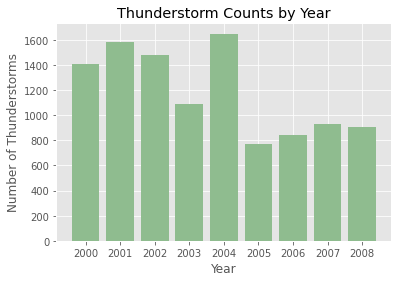

1184.2222222222222
119399.44444444444


In [13]:
counts = []
for df in dfs:
  counts.append(df.where(df.thunder == 1).count())
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(labels)]

plt.bar(x_pos, counts, color='darkseagreen')
plt.xlabel("Year")
plt.ylabel("Number of Thunderstorms")
plt.title("Thunderstorm Counts by Year")

plt.xticks(x_pos, labels)

plt.show()
import statistics
print(statistics.mean(counts))
print(statistics.variance(counts))

Note: There are far more thunderstorms recorded in 2000-2004 compared to 2005-2008

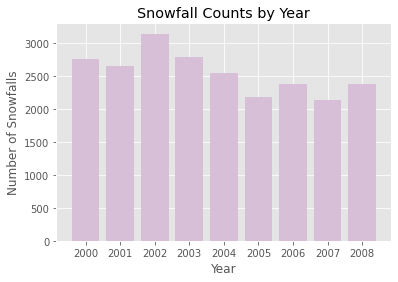

In [14]:
counts = []
for df in dfs:
  counts.append(df.where(df.snow == 1).count())
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(labels)]

plt.bar(x_pos, counts, color='thistle')
plt.xlabel("Year")
plt.ylabel("Number of Snowfalls")
plt.title("Snowfall Counts by Year")

plt.xticks(x_pos, labels)

plt.show()

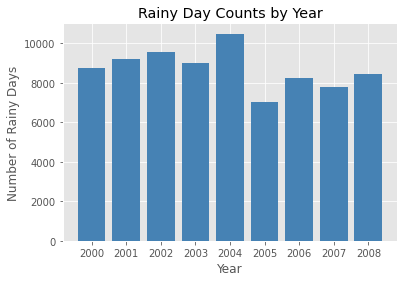

In [15]:
counts = []
for df in dfs:
  counts.append(df.where(df.rain == 1).count())
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(labels)]

plt.bar(x_pos, counts, color='steelblue')
plt.xlabel("Year")
plt.ylabel("Number of Rainy Days")
plt.title("Rainy Day Counts by Year")

plt.xticks(x_pos, labels)

plt.show()

Thunderstorm counts might simply be explained by more precipitation during those years

[41.8180109565995, 41.70885067859713, 41.91237374835637, 42.06583801250127, 41.14037803973564, 42.19916694140889, 41.0901205091664, 42.70521322111736, 41.93653285419722]


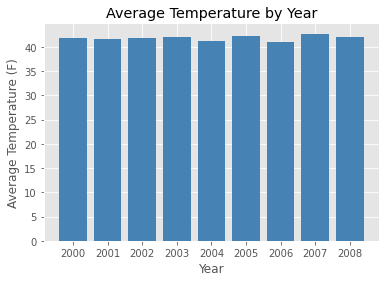

In [16]:
avg_temps = []
for df in dfs:
  a = df.agg(avg(col("temp_ft")).alias("hi"))
  avg_temps.append(a.collect()[0]["hi"])
  
print(avg_temps)

x_pos = [i for i, _ in enumerate(labels)]

plt.bar(x_pos, avg_temps, color='steelblue')
plt.xlabel("Year")
plt.ylabel("Average Temperature (F)")
plt.title("Average Temperature by Year")

plt.xticks(x_pos, labels)

plt.show()

Union all yearly datasets for greater ease of use and check descriptive statistics

In [41]:
import functools
def unionAll(dfs):
    return functools.reduce(lambda df1, df2: df1.union(df2.select(df1.columns)), dfs)

udf = unionAll(dfs)

udf.count()
udf.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,1183138,167.91214042656054,105.69595035531498,0,365
station_num,1183138,445015.69844092574,279217.6293945302,10010,878600
year,1183138,2004.0070270754552,2.579198964856385,2000,2008
month,1183138,6.298236553977643,3.514740403729107,1,12
day,1183138,15.425564050854591,8.818736804315972,1,31
temp_ft,1183138,41.83581129167103,28.2871949909048,-72.3,104.4
dewpt_ft,1181137,33.6055642148235,24.633640208439463,-78.6,87.1
slp_mb,895429,719.9068225398634,461.8814778363916,0.0,1077.1
visib_mi,1171462,7.873666836823783,7.318913626418848,0.0,88.8


Where is there a temperature of -75F...

Check the distribution of features

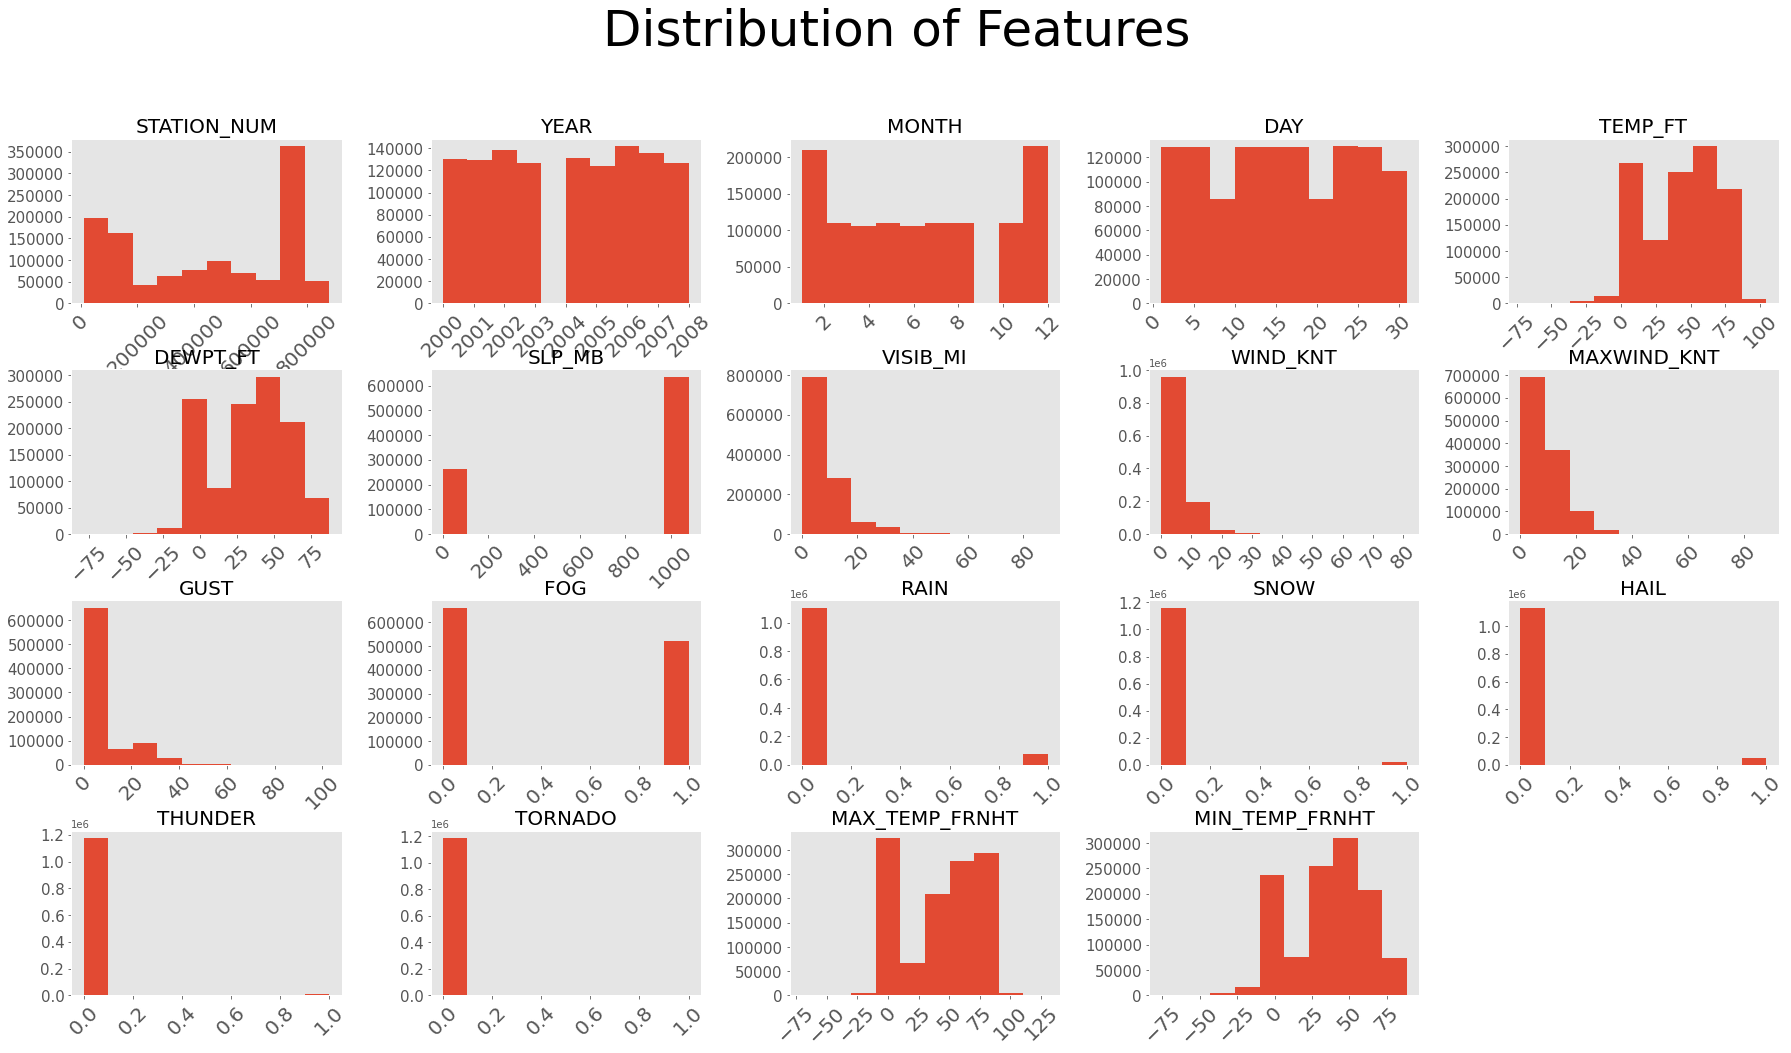

In [112]:
from matplotlib import cm
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(udf.drop("_C0").toPandas().describe().columns, range(1,20)):
  ax = fig.add_subplot(4,5,num)
  ax.hist(udf.toPandas()[col])
  # plt.style.use('dark_background')
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=.85,hspace=.4)
plt.show()

In [42]:
udf.groupby("hail").count().show()
udf.groupby("fog").count().show()
udf.groupby("thunder").count().show()

+----+-------+
|hail|  count|
+----+-------+
|   1|  50405|
|   0|1132733|
+----+-------+

+---+------+
|fog| count|
+---+------+
|  1|521719|
|  0|661419|
+---+------+

+-------+-------+
|thunder|  count|
+-------+-------+
|      1|  10658|
|      0|1172480|
+-------+-------+

